## 2. Machine Learning for Regression


In [1]:
import pandas as pd
import numpy as np

## 2.2 Data preparation

Data preparation is a key element of every Machine Learning (ML) project. At this stage, we want to learn more about the data and the problem. 
- Transform the data so it can be put into a ML algorithm.
- Usually this means extracting different features.
- Clean the data / remove all the noise.
- Build the pipelines (that transform raw data into clean data).
- Convert data into tabular form (needed to put into machine learning model).

Here, we'll analyze the columns of our dataframe to understand what columns are there and what they actually mean.

**Pandas attributes and methods:**
- `pd.read_csv(<file_path_string>)` -> read csv files
- `df.head()` -> take a look at the dataframe
- `df.columns` -> retrieve column names of a dataframe
- `df.columns.str.lower()` -> lowercase all the letters
- `df.columns.str.replace(' ', '_')` -> replace the space separator
- `df.dtypes` -> retrieve data types of all features
- `df.index` -> retrieve indices of a dataframe

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
# Download the data
# !wget $data

In [4]:
df = pd.read_csv(data)
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
# Take a look at the first couple of rows 
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# Contains the names of the columns and it's an index
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [9]:
# Tells us what is the data types of each of the column
# We're interested in objects
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [10]:
# Get all the columns (series: index,values) that are of type object
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [11]:
# Get access to the index of the series 
df.dtypes[df.dtypes == 'object'].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [12]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [13]:
# Convert it to python list
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [14]:
# Standardize the format of all the values in each column
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [15]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

**Pandas attributes and methods:**
- `df[col].unique()` -> return a list of unique values in the series
- `df[col].nunique()` -> return the number of unique values in the series
- `df.isnull().sum()` -> return the number of null values in the dataframe

**Matplotlib and seaborn methods:**
- `%matplotlib inline` -> assure that plots are displayed in jupyter notebook's cells
- `sns.histplot()` -> show the histogram of a series

**Numpy methods:**
- `np.log1p()` -> apply log transformation to a variable after adding one to each input value.

Long-tail distributions usually confuse the ML models, so the recommendation is to transform the target variable distribution to a normal one whenever possible. 

In [17]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [18]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Visualize the distribution of price

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all these plots can be displayed in a notebook
%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

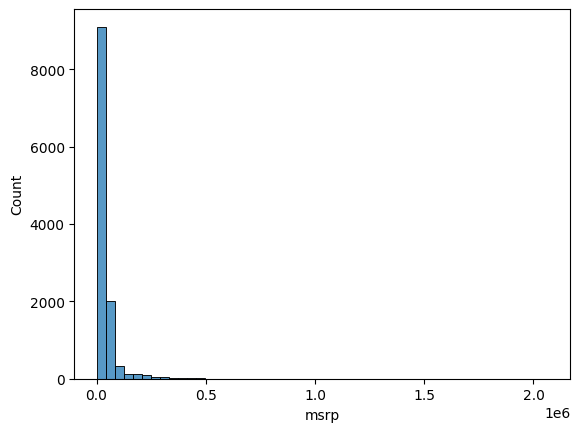

In [20]:
# Plot the histogram of MSRP
# bins: how many bars we actually have
# 1e6: 10^6 = 1,000,000 = 1 mil
sns.histplot(df.msrp, bins=50)

The above distribution is called a long-tail distribution because you can think of the right-hand side as a tail. It's very shallow so there are not many values but they have huge values. Most of the data is located on the left-hand side of the histogram. 

<Axes: xlabel='msrp', ylabel='Count'>

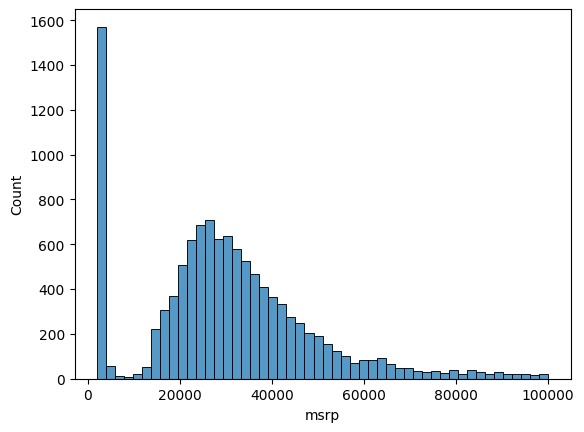

In [21]:
# Zoom in to look at prices that are not so large (e.g., 100,000)
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

This kind of distribution is not really good for machine learning because this tail will confuse our model.

So what we want to do is to get rid of this long tail. For that, what we usually do is we apply the logarithm to the price and we get more compact values.

In [22]:
# The value of the logarithm is not that large and the increase between the logarithm of them is not 
# that high so it is able to bring very high values down to make them lower.
# However, the problem with logarithm is that we can't have a zero as input because a logarithm of zero does not exist.
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [23]:
# It's pretty common to add one to all the input values to make sure we don't have this situation.
# The logarithm of 1 is 0. 
# Numpy provides the np.log1p() function to add one to all the values and then apply logarithm.
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

In [24]:
# Apply the logarithm distribution to the MSRP series
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

The values became smaller and we can plot a histogram again to visualize the result. 

<Axes: xlabel='msrp', ylabel='Count'>

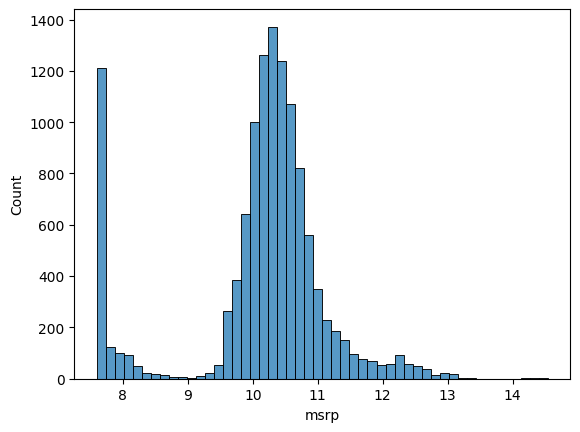

In [25]:
sns.histplot(price_logs, bins=50)

The tail is gone with all these large prices kind of collapse into a small area on the right-end of the graph. 

The cars for usual consumers are still concentrated around the center. 

The shape of the graph now resembles a bit like the bell-curve shape, which is called a normal distribution. The distribution looks like normal even though we have this weird peak on the left-most end of the graph. 

This situation is ideal for models. If your target variable looks like that, models do quite well when they need to predict this as they do a lot better with normal distributions than with long-tail distributions. Long-tail distributions usually confuse models. 

Therefore, we typically want to get rid of long-tail distributions and one way of doing this is by applying logarithm to the values. 

In [26]:
# Look for missing values in each of the column.
# Before training the model, we will need to do something with them.
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

Before we train a model, we need to make sure that we can validate the model and we will set up this framework at this stage.

In general, the dataset is splitted into three parts: training, validation, and test. For each partition, we need to obtain feature matrices (X) and vectors of targets (y). First, the size of the partitions is calculated. Next, the records are shuffled to ensure that the values in the three partitions contain non-sequential records from the dataset. Finally, the partitions are created using the shuffled indices. 

**Pandas attributes and methods:**
- `df.iloc[]` -> return subsets of records of a dataframe being selected by numerical indices
- `df.reset_index()` -> restate the original indices
- `del df[col]` -> eliminate a column variable

**Numpy methods:**
- `np.arange()` -> return an array of numbers
- `np.random.shuffle()` -> return a shuffled array
- `np.random.seed()` -> set a seed for reproducibility


Let's draw it

In [27]:
# Calculate the size of our dataframe
len(df)

11914

In [28]:
# Calculate size of the 20% of the dataset
# We want a number that is integer
len(df) * 0.2

2382.8

In [29]:
n = len(df)

# Size of validation dataset
n_val = int(n * 0.2)
# Size of test dataset
n_test = int(n * 0.2)
# Size of train dataset
n_train = n - n_val - n_test

We can use `n_train = int(n * 0.6)` but there would be a problem when we tally the number of records.

The size of our calculation for n_train using `n_train = int(n * 0.6)` would be smaller than the actual number of records in our dataframe because of the integer round down. To make sure that we don't accidentally leave a few records, we just use `n_train = n - n_val - n_test`.

In [30]:
n, n_val + n_test + int(n * 0.6) 

(11914, 11912)

In [31]:
# The numbers add up
n, n_val + n_test + n_train

(11914, 11914)

In [32]:
# Size of each dataset
n_val, n_test, n_train

(2382, 2382, 7150)

In [33]:
# Take a part of the dataframe out of this size
# Return a subset of the dataframe
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [34]:
# We can give it a range like slicing
df.iloc[10:20]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
11,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
12,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,44400
13,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,19,3916,37200
14,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,19,3916,31500
15,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,convertible,25,18,3916,48250
16,bmw,1_series,2013,premium_unleaded_(required),320.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,43550
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000


In [35]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [36]:
# We need to perform shuffling on these records to make sure we break any existing order in the dataset
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


In [37]:
# Generate a sequence of numbers from 1 to n-1
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [38]:
# To make sure the results are reproducible, we usually set a random seed
np.random.seed(2)
# Shuffle the idx
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [39]:
# Instead of getting the rows directly from iloc, we get them through idx
df.iloc[idx[:10]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
8001,volkswagen,rabbit,2008,regular_unleaded,170.0,5.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,29,22,873,17575
2882,bentley,continental_gtc,2013,premium_unleaded_(required),500.0,8.0,automatic,all_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,24,14,520,191400
649,bmw,6_series,2015,premium_unleaded_(required),315.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,coupe,32,21,3916,76100
616,maybach,57,2012,premium_unleaded_(required),543.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury",large,sedan,16,10,67,379050
4459,ford,f-150_heritage,2004,regular_unleaded,202.0,6.0,manual,four_wheel_drive,2.0,NaN,large,regular_cab_pickup,18,13,5657,26030


In [40]:
# Instead of getting the rows directly from iloc, we get them through idx
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [41]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [42]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [43]:
# We don't need to know what was the original index of these records so we can 
# reset the index
df_train.reset_index()

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [45]:
# Perform some transformation to y by applying the log transformation
# Get the underlying numpy arrays instead of pandas series
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [46]:
y_train, y_val, y_test

(array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
        12.62248099, 10.54061978]),
 array([10.19936098, 10.90872279,  9.72770457, ..., 11.21756062,
         9.77542688, 10.1924563 ]),
 array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
        10.00789261, 10.40414162]))

If we accidentally use the MSRP variable, then we will be using the price variable as a feature for predicting price and of course, our model will be perfect and we might spend a lot of time figuring out what's wrong. 

This situation happened many times to other data scientist/machine learning practitioners like the target variable accidentally got into the dataframe. So that's why we always try to delete it from our dataframe after splitting the data and moving the target variable into a separate variable to avoid accidentally using it for training purposes. 

In [47]:
# Remove this MSRP variable from our dataframe to avoid accidentally using it 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [48]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [49]:
len(y_train)

7150

In this lesson, we implemented the train, val, test split framework for validation manually. We didn't use a library for that. Instead, we just used plain pandas and numpy to split our dataset into three parts.

## 2.5 Linear regression

Model for solving regression tasks, in which the objective is to adjust a line for the data and make predictions on new values. The input of this model is the **feature matrix** `X` and a `y` **vector of predictions** is obtained, trying to be as close as possible to the **actual** `y` values. So, the output of the model is a number. 

Recall the formula: 

$g(X) \approx y$, where `g` (linear regression) is our model, `X` is the feature matrix, and `y` (price) is our target.

In our case, 

$g(X_i) \approx y_i$, where $X_i$ is a specific car, and $y_i$ is its price.

A row in our feature matrix (e.g., a n-dimensional vector) consisting of n elements, $X_i = (X_{i1}, X_{i2}, ... , X_{in})$.

We want to have a function that takes in all these features and then produces something that is close to the actual price, $g(X_{i1}, X_{i2}, ... , X_{in}) \approx y_i$


The linear regression formula is the sum of the bias term \( $w_0$ \), which refers to the predictions if there is no information, and each of the feature values times their corresponding weights as \( $x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$ \).

So the simple linear regression formula looks like:

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.

And that can be further simplified as:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

Here is a simple implementation of Linear Regression in Python:
~~~~python
w0 = 7.1
def linear_regression(xi):
    n = len(xi)

    pred = w0
    w = [0.01, 0.04, 0.002]
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred
~~~~

If we look at the $\displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$ part in the above equation, we know that this is nothing else but a vector-vector multiplication. Hence, we can rewrite the equation as $g(x_i) = w_0 + x_i^T \cdot w$.

We need to assure that the result is shown on the untransformed scale by using the inverse function `exp()`. 

In [50]:
# Use the training dataset for training the model.
# Take a look at a specific row in the dataset
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

We need to implement a function that takes in a row in the feature matrix (`xi`), do something and then return the prediction. 

This is how we can do it in Python code:
~~~~python
def g(xi):
    # do something
    return prediction


In [51]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    # For every element of our feature vector, we multiply it by its corresponding weight and then sum the result
    # with the prediction
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

The bias term (w0) is the prediction that we will make without knowing anything about the car. But we actually know something about the car (engine_hp, city_mpg, popularity).

So the simple linear regression formula looks like:

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.

And that can be further simplified as:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

In [52]:
# feature vector
xi = [453, 11, 86]
# bias term
w0 = 0
# weights
w = [1, 1, 1]

In [53]:
# Apply the linear regression model
linear_regression(xi)

550

In [54]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [55]:
# Apply the linear regression model
linear_regression(xi)

12.312

Bias term: 
- This is what we predict about the car if we don't know anything about this.
- Let's say we don't know anything about the car, it's just an average car. So what would be the price we predict for this car.
- For this car, we say it's 7.17.

But we actually do know something about the car. We know that it has 453 engine horsepower, and for each engine horsepower, the price would increase by 0.01. 
- Basically, the more horsepower the engine has, the more expensive the car becomes. 

For the next feature, it's miles per gallon in the city. 
- Apparently, the more car consumes in the city, the more expensive it is.
- So for any extra miles per gallon, its price is affected by 0.004, making it more and more expensive. 
- Let's say if we have a car that has 11 miles per gallon in the city, then it would actually be more expensive by 0.04 than a car that has 10 miles per gallon in the city.
- It makes sense because the cars that consume more fuel, they are probably fancier that's why you have this relationship. 

And then finally, we have this popularity, which is number of mentions on twitter. 
- It has a pretty low weight so it doesn't seem like it's affecting the price too much. 
- So for every extra mention on twitter, the car becomes just a little bit more expensive. 
- It's like how many people mention this car in general so a lot of people need to mention this car for this to be popular and expensive.

This is how we can make sense from this and remember this is not the final price because we applied logarithm transformation earlier. Now, we need to undo this logarithm by applying exponent with `np.exp() - 1`. 

In [56]:
# Compute the final prediction for this specific car after applying exponent
np.exp(12.312) - 1

np.float64(222347.2221101062)

In [57]:
# Use Numpy shortcut function np.expm1()
np.expm1(12.312)

np.float64(222347.2221101062)

In [58]:
# Verify that np.expm1() can undo np.log1p()
np.log1p(222347.2221101062)

np.float64(12.312)

## 2.6 Linear regression vector form

This is how we make a prediction for a specific car:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij} = w_0 + x_{i}^{T}w$ 

$\displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$ is nothing else but a dot product. So we talked about dot product, this is vector-vector multiplication and we can actually rewrite it slightly differently using the vector multiplication notation.

The formula of linear regression can be synthesized with the dot product between features and weights. The feature vector includes the *bias* term with an *x* value of one, such as $w_{0}^{x_{i0}}, \ where\ x_{i0} = 1\ for\ w_0$. The 1 doesn't really affect the result so we can imagine that it doesn't exist.

$w = [w_0, w_1, w_2, ... , w_n]$, a n+1 dimensional vector.

$X_i = [X_{i0}, X_{i1}, X_{i2}, ... , X_{in}] = [1, X_{i1}, X_{i2}, ... , X_{in}] $

This is our prediction:

$x_{i}^{T}w = w_0 + ... $

When all the records are included, the linear regression can be calculated with the dot product between ***feature matrix*** and ***vector of weights***, obtaining the `y` vector of predictions.

We will learn how to do this for multiple rows (or cars) at the same time.


In [59]:
def dot(xi, w):
    """Implement dot product between a vector with features and a vector with weights/vector-vector multiplication."""
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [60]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [61]:
# Create a new vector with weights
w_new = [w0] + w

In [62]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [63]:
# Python list concatenation
[1] + [1, 2, 3]

[1, 1, 2, 3]

In [64]:
# We notice that we can make it even shorter by adding a fictional feature '1' to our feature vector.
def linear_regression(xi):
    # Prepend 1 at the beginning
    xi = [1] + xi
    return dot(xi, w_new)

In [65]:
# The result is the same
linear_regression(xi)

12.312

In [66]:
# Provide a new example for prediction
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [67]:
# Generalize it to a complete feature matrix
# Observations of each car
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

The linear regression model is nothing else but matrix-vector multiplication.

In [68]:
# Multiply matrix X with vector w_new (matrix-vector multiplication) and this is our model.
def linear_regression(X):
    return X.dot(w_new)

In [69]:
# Obtain the predicted price for each car
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

Obtaining predictions as close as possible to $y$ target values requires the calculation of weights from the general LR equation. 

The feature matrix does not have an inverse because it is not square, so it is required to obtain an approximate solution, which can be obtained using the **Gram matrix** (multiplication of feature matrix ($X$) and its transpose ($X^T$)). 

The vector of weights or coefficients $w$ obtained with this formula is the closest possible solution to the LR system.

Normal Equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

Here, we'll answer the question on we come out with the weights.

Recall the formula: $g(X) = Xw \approx y$

This is a system we need to solve for $w$.

$X^{-1}Xw \approx X^{-1}y$

If $X^{-1}$ (the inverse of $X$) exists, then it cancels $X$ and becomes $I$ (identity matrix). 

We will then end up with this:

$Iw = X^{-1}y$

$w = X^{-1}y$

This $X$ is usually a rectangular matrix. It has a lot of rows and a few columns (a dimensionality of m * n+1) so it's definitely not square. For this kind of matrix, the inverse doesn't exist so we cannot just go ahead and make numbers. Therefore, the solution doesn't exist for this system we have. 

However, we can find an approximate solution to this by multiplying both sides with the $X$ transpose ($X^T$). 

$X^TXw = X^Ty$

For this matrix (Gram matrix), the inverse usually exists because it's square so we can try to invert this matrix. The dimension of Gram matrix will be (n+1) x (n+1).

$(X^TX)^{-1}X^TXw = (X^TX)^{-1}X^Ty$

$Iw = (X^TX)^{-1}X^Ty$

$w = (X^TX)^{-1}X^Ty$

So this gives us a way to find $w$. However, this $w$ is not the solution to the system because the solution doesn't exist but this $w$ is the closest possible solution to that system. To learn more about the proofs on this claim, refer to the book, 'Elements of statistical learning'. 

In [70]:
def train_linear_regression(X, y):
    pass

In [71]:
# This X is a bit problematic because it has more columns than rows
# The inverse of this kind of matrix most probably will not exist 
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [72]:
# Let's come up with a matrix as an example 
# Hopefully the inverse of this matrix will exist
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

Include the bias term as it gives us the baseline of the price of a car if we don't know 
anything about this car. If we don't include the bias term, then we don't know what we should base our prediction on. 

In [73]:
# Create a vector of ones using the np.ones(size) function
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [74]:
# Add another column to the beginning of matrix X
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [75]:
# Create the y vector of predictions
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [76]:
# Implement the gram matrix
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [77]:
# Find the inverse of the gram matrix
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [78]:
# The multiplication between XTX_inv and XTX gives us an identity matrix.
# It's not exactly an identity matrix because there are these numbers that are super tiny but 
# we can safely ignore them and treat them as 0 by rounding. 
XTX_inv.dot(XTX)

array([[ 1.00000000e+00, -1.10748043e-12, -1.65667393e-13,
         8.21071509e-13],
       [ 2.75793928e-18,  1.00000000e+00, -3.77759754e-17,
         1.83712298e-15],
       [ 6.28430684e-17,  2.03945883e-14,  1.00000000e+00,
        -1.38348195e-14],
       [ 2.35051643e-20,  5.01606559e-17, -2.85608922e-19,
         1.00000000e+00]])

In [79]:
XTX_inv.dot(XTX).round(1)

array([[ 1., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.],
       [ 0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [80]:
# w_full contains all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [81]:
# Break it into bias term and the rest of usual w (e.g., w1, w2, ... , wn)
w0 = w_full[0]
w = w_full[1:]

In [82]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

Positive weights mean that for extra horsepower that we have in our car, the price increases.

Negative weights mean that instead of adding to the price, the price decreases for each extra unit (e.g., the older the age of a car, the lower the price of the car). 

In [83]:
# Implement the train linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [84]:
# Use the original matrix X without the ones to test the train_linear_regression function
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [85]:
# The result is the same as earlier
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

## 2.8 Car price baseline model

In this lesson, we build a baseline model and apply the `df_train` dataset to derive weights for the bias ($w0$) and the features ($w$). For this, we use the `train_linear_regression(X, y)` function from the previous lesson.

Linear regression only applies to numerical features. Therefore, only the numerical features from `df_train` are used for the feature matrix.

We notice some of the features in `df_train` are `nan`. We set them to `0` for the sake of simplicity, so the model is solvable, but it will be appropriate if a non-zero value is used as the filler (e.g., mean value of the feature). 

Once the weights are calculated, then we apply them on $g(X) = w_0 + X \cdot w$ to derive the predicted y vector.

Then we plot both predicted y and the actual y on the same histogram for a visual comparison.


In [86]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [87]:
# Look for the numerical columns
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [88]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [89]:
# Extract the five numerical columns
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

# Get the subset of columns
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [90]:
# Check for missing values
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [91]:
# Easiest way to fill missing values is to fill them with zeros.
# By filling missing values with zero, we make the model ignore these features. 
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

$g(X_i) = w_0 + X_{i1}w_1 + X_{i2}w_2 + ... + X_{in}W_n$

Assume $X_{i1}$ value is missing, what we can do is to let this value be `0` and when we do this, what we get in turn is $w_0 + X_{i2}w_2 + ... + X_{in}W_n$. So effectively, we just ignore the existence of that feature. 

`0` is not always the best way to deal with missing variables. For example, if the missing value is for `engine_hp`, it doesn't make much sense for a car to have `0` horsepower. Typically, there are more or in case of cylinders, there can't be engines with `0` cylinders. From common sense point of view, maybe replacing it with `0` doesn't make much sense but from practical point of view, when it comes to machine learning, sometimes `0` works fine because filling missing values with non-zeros like mean values just makes the process a bit complicated, that's why we'll just go with zeros. 

In [92]:
# Extract the values into a numpy array
X_train = df_train[base].fillna(0).values

In [93]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.927257388069986),
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

In [94]:
# Now we can use these weights to make predictions
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<Axes: ylabel='Count'>

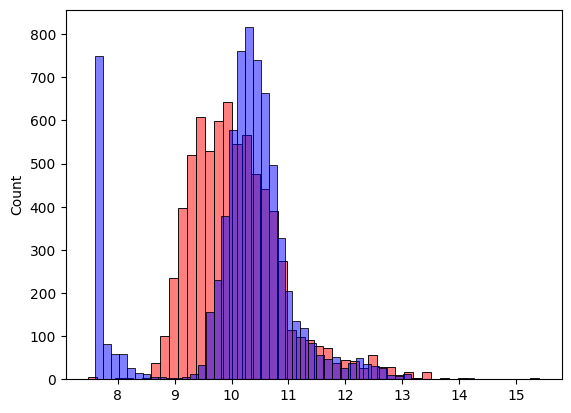

In [95]:
# Plot these predictions to see if they look similar to the 
# original target variable that we want to predict.
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


We see that the shape of predictions is off like it's always lesser. Even the peaks of the distributions don't match so in many cases, it always predicts a smaller value than the actual. 

Based on our plot, we can see that our model might not be ideal but we need to have an objective way of saying whether a model is good or bad. And when we start improving our model, we want to make sure that we indeed improved our model, not just by looking at the charts. 

## 2.9 RMSE

In the previous lesson, we found out our predictions were a bit off from the actual target values in the training dataset. We need to find a way to quantify how good or bad the model is. This is where RMSE can be of help.

Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure can then be used to compare models, enabling us to choose the one that gives the best predictions. 

$$RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the prediction
- $y_i$ is the actual value
- $m$ is the number of observations in the dataset (i.e., cars)

#### Understanding RMSE

First, we calculate the difference between the prediction and the actual value (i.e., price) $\rightarrow g(x_i) - y_i$. 

We then square the difference (Squared Error) $ \rightarrow {(g(x_i) - y_i)^2}$

Then, we need to take an average (Mean Squared Error) $ \rightarrow \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}$

And finally, we compute the square root of the Mean Squared Error $ \rightarrow \sqrt{ \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}}$


In [96]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [97]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

In [98]:
# We can further simplify the formula
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [99]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the model

Calculation of the RMSE on validation partition of the dataset of car price prediction. In this way, we have a metric to evaluate the model's performance. 

Recall we took the train dataset to train our linear regression model and then we applied it to our train dataset to calculate the RMSE. Instead of applying to train dataset, we should apply this to validation data and then look at the RMSE on validation data. 

In [100]:
def prepare_X(df):
    """Prepare the dataset."""
    # Select the numerical column
    df_num = df[base]
    # Fill the missing values
    df_num = df_num.fillna(0)
    # Extracting the feature matrix into a numpy array
    X = df_num.values
    return X

In [101]:
# Prepare the train matrix
X_train = prepare_X(df_train)
# Train the model 
w0, w = train_linear_regression(X_train, y_train)

# Prepare our validation dataset
X_val = prepare_X(df_val)
# Perform prediction by applying the weights we get from training 
# the model to the feature matrix of the validation dataset.
y_pred = w0 + X_val.dot(w)
# Compute the RMSE of this prediction
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 2.11 Simple feature engineering

Feature engineering is the process of creating new features.

The feature `age` of the car was included in the dataset, obtained with the substraction of the maximum year of cars and each of the years of cars. This new feature improved the model performance, measured with the RMSE and comparing the distributions of y target variable and predictions. 

In this lesson, we'll add more features to our model. 

In [102]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


We know that `year` is one of the most important variables/columns for predicting the price of cars because if a car is old then it's usually cheaper and if a car is new, then it's more expensive. So we want to use this variable and instead of using it as `year`, what we can do is we compute the age of a car. 

We don't know when this data was collected so we need to take a look.

In [103]:
df_train.year.max()

np.int64(2017)

This data is collected in 2017. Assume now is 2017 and we want to compute how old the cars are. 

In [104]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

Some of the cars are 0 years old while some of the cars are 9 years old.

Let's put this new feature `age` into our dataframe. 

In [105]:
def prepare_X(df):
    # Make a copy of the original dataframe to work on
    df = df.copy()

    # Add a new feature
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [106]:
X_train = prepare_X(df_train)

In [107]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

Ensure that the `prepare_X` function does not modify any data of the input dataframe directly to avoid a situation where the function does something that cannot be undone. For this, we just make a copy of the dataframe and then work with the copy inside this function. With this, the original dataframe will not change.

In [108]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [109]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5172055461058299)

Our model improved from 0.76 to 0.51 so it's a big improvement. Now, we can plot the predictions and actual values in a histogram to visual the result.


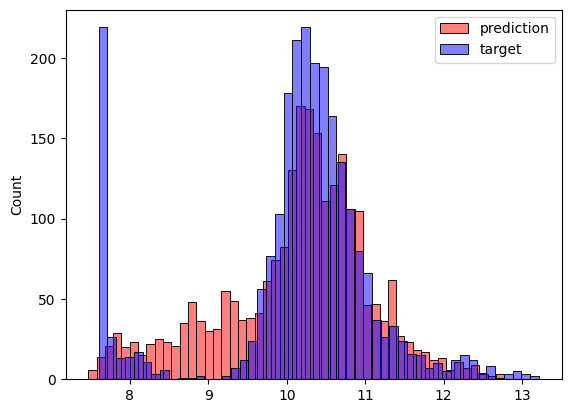

In [110]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

## 2.12 Categorical variables

Categorical variables are typically represented as strings, and pandas identifies them as object types. However, some variables that appear to be numerical may actually be categorical (e.g., the number of doors a car has). All these categorical variables need to be converted to a numerical form because ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding. 

In [111]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [112]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

Categorical variables are variables that are categories. These are typically strings and not numbers (e.g., `make`, `model`, `engine_fuel_type`, `transmission_type`, `driven_wheels`). 

All these variables that have dtype `object` are categorical variables. However, there is one variable (`number_of_doors`) that looks like it's numerical but it's actually not a numerical value but a categorical variable because they are distinct types of cars (i.e., cars that have two doors, cars that have three doors, and cars that have four doors) so it's not really a numerical variable even though it looks numerical. It just happened that the values of this variable are numbers and that's why pandas treats them as usual numbers. 

We want to use this kind of categorical variables for our model because they could be important. For example, cars with two doors are probably more expensive than cars with four doors. 

The typical way of encoding such categorical variables is by representing it with a bunch of binary columns for each value. 

In [113]:
# Turn this series into an integer so that we end up with ones and zeros
df_train.number_of_doors == 2

0        True
1       False
2       False
3       False
4       False
        ...  
7145     True
7146     True
7147    False
7148    False
7149    False
Name: number_of_doors, Length: 7150, dtype: bool

In [114]:
# astype('int') function turns booleans into integers
(df_train.number_of_doors == 2).astype('int')

0       1
1       0
2       0
3       0
4       0
       ..
7145    1
7146    1
7147    0
7148    0
7149    0
Name: number_of_doors, Length: 7150, dtype: int64

Do this for all the different number of doors and write it back to a dataframe.

```Python
for v in [2, 3, 4]:
    # Use string template to replace s with the value in v
    df_train['num_doors_%s' %v] =  (df_train.number_of_doors == v).astype('int')
```

In [115]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%d' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [116]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [117]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.515799564150169)

The improvement is almost negligible so the number of doors feature is not that useful but I'm pretty sure that if we add `make`, the `make` should be quite useful. 

In [118]:
df.make.nunique()

48

In [119]:
# See which are the most popular manufacturers
df.make.value_counts()

make
chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyke

In [120]:
# Get the top 5 most popular manufacturers indices
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [121]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')

    for v in [2, 3, 4]:
        df['num_doors_%d' %v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' %v)

    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [122]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   0.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   1.,   0.],
       [148.,   4.,  37., ...,   0.,   0.,   0.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   0.],
       [563.,  12.,  21., ...,   0.,   0.,   0.],
       [200.,   4.,  31., ...,   1.,   0.,   0.]])

In [123]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556795)

The results improved but of course, the improvement is not as drastic as when we added `age` but still, it decreased by 1%. 

We can do the same for other variables or for other categories. 

In [124]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [125]:
# Place all the categorical variables into a list
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

# Create a dictionary that contains the top 5 most common values
categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

categorical

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500', 'tundra', 'f-150', 'sierra_1500', 'tacoma'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'hatchback',
  'luxury,performance'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [126]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [127]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(53.70545993470668)

We get a value that is significantly higher than what we had before. Before, we had 0.5 and now all of a suden it's 53. 

In [128]:
w0, w

(np.float64(120883643437600.25),
 array([ 1.97815705e-01,  3.59996839e+00,  1.77430262e-01,  2.54401440e+00,
        -3.91209144e-04,  1.31841741e+00, -1.87629844e+03, -1.87912990e+03,
        -1.87135179e+03, -3.16525752e+00,  8.11185787e-01,  8.76573747e+00,
        -7.26348843e+00, -5.87324602e+00, -3.43160292e+01, -2.49085861e+01,
        -4.50399871e+01, -2.85752551e+01,  9.63377197e+00,  3.79004788e+02,
         3.54982604e+02,  3.73756735e+02,  4.23480737e+02,  3.19067990e+02,
        -1.20883643e+14, -1.20883643e+14, -1.20883643e+14, -1.20883643e+14,
        -2.07609706e-01, -6.37629899e-01, -4.67620395e-01,  2.49283098e+01,
         4.01327473e+00, -2.32017237e+01, -2.26915593e+01, -5.85429953e+00,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

We can conclude that something went wrong. 

We wanted to improve our model by adding more variables but we just made it worse and in the next lesson, we'll see why that happened and how to fix it. 

## 2.13 Regularization

There are a lot of methods on how you can improve your ML model accuracy. They include feature engineering, missing value imputation, improvements in data quality, etc.

One of the effective approaches is regularization. It is a popular concept that helps to control coefficients under the numerical instability in computation such as model training. 

A matrix inversion should be considered with caution. If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), the matrix is singular, which means the inverse matrix does not exist. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization, the model performance improved. 

#### Linear Combination
The meaning of the term *linear combination*:
- One column is a linear combination of others when you can express one column of a matrix as a sum of other columns.
- The simplest example is when a column is an exact duplicate of another column.
- Another example. Let's say we have 3 columns: `a`, `b`, and `c`. If `c = 0.2 * a + 0.5 * b`, then `c` is a linear combination of `a` and `b`.
- More formal definition: https://en.wikipedia.org/wiki/Linear_combination

#### Ridge Regression
The regularization technique used (adding a factor to the diagonals of Gram Matrix) in this lesson is Ridge Regression. 

Linear dependent columns in a matrix is not a typical case in real-world problems, even though due to noise in the data, characteristics of your machine, OS, or Numpy version, there might be some similar vectors in the above sense. When it happens, the weight vector `w` can result in very large values (both positive and negative), and the overall model predictions won't be useful. 

To overcome this numerical instability problem, we can refer to regularization. 

Regularization in linear regression gurantees the existence of inverse matrix ($X^TX)^{-1}$.

One of the regularization techniques (Ridge Regression) is adding a factor to the diagonal of matrix $X^TX$ like this:
$$w = (X^TX + \alpha I)^{-1}X^Ty$$

where
- $I$ is an Identity matrix, and
- $\alpha$ is a (typically small) factor.

#### Summary
The main purpose of regularization techniques is to control the weights vector `w` and not let it grow too large in magnitude. Regularization is capable of finding a solution when there are correlated columns, reducing overfitting and improving your model performance in many cases.

In this lesson, we will take a closer look at why we might want to regularize our model.

In [129]:
# An example to check the effects of duplicate columns
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [130]:
# Compute the gram matrix
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

Column 2 and column 3 has the same values. When this happens in a matrix we want to invert, the inverse simply does not exist because in linear algebra, we say that one column is a linear combination of other columns, which means that it's possible to express column 3 with other columns of the matrix (it's a duplicate of column 2). 

Let's see what happens when we try to inverse it.

In [131]:
# np.linalg.inv(XTX)

```python
np.linalg.inv(XTX)
```

It complains that this matrix is singular and it cannot compute the inverse of this matrix. 

Therefore, the inverse of this $XTX$ doesn't always exist. This is not the case in our earlier problem because usually the data is not super clean in a way that sometimes there is noise (i.e., added a tiny number to one of the values in the matrix).   

In [132]:
# The same example but with some noise added
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000000001],
]

X = np.array(X)
X

array([[4., 4., 4.],
       [3., 5., 5.],
       [5., 1., 1.],
       [5., 4., 4.],
       [7., 5., 5.],
       [4., 5., 5.]])

In [133]:
# The resulting matrix is not singular anymore so it is numerically invertible
XTX = X.T.dot(X)
XTX

array([[140., 111., 111.],
       [111., 108., 108.],
       [111., 108., 108.]])

In [134]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.85852104e-02, -3.09242857e+02,  3.09207143e+02],
       [-3.09250483e+02,  7.03687442e+13, -7.03687442e+13],
       [ 3.09210826e+02, -7.03687442e+13,  7.03687442e+13]])

It then tries to find the inverse even though the inverse shouldn't exist so it kind of comes up with some huge numbers in the resulting inverted matrix. 

In [135]:
y= [1, 2, 3, 1, 2, 3]

In [136]:
XTX_inv.dot(X.T).dot(y)

array([ 5.17914730e-01, -8.82187500e+03,  8.82178906e+03])

We end up finding that the leftmost feature is fine (unique feature), but the second and third feature is basically just some huge numbers.

This problem happens when we have a situation where there are duplicates in our feature matrix and to solve this problem, we can add a small number to the diagonal of this matrix (i.e., adding $\alpha$ to the diagonal values).

Let's use the following matrix as an example to illustrate the concept:

```python
XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]

```

In [158]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [159]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

No problem in finding the inverse of the matrix after adding a few numbers but the resulting numbers are still huge.

So to fix this problem, we need to add a small number to the diagonal of this matrix.

In [160]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]

XTX = np.array(XTX)

In [161]:
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

In [162]:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]

XTX = np.array(XTX)

In [163]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

Adding a small number to the diagonal of this matrix helps control the numbers. Now, these numbers became smaller and the larger the numbers we add to the diagonal, the more we have these weights under control. 

The reason it works is because by adding something onto the diagonal, we make sure that it's less possible for a column to be a duplicate of another column. 

In [165]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [166]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

In [167]:
XTX = XTX + 0.01 * np.eye(3)
XTX

array([[1.01     , 2.       , 2.       ],
       [2.       , 1.01     , 1.0000001],
       [2.       , 1.0000001, 1.01     ]])

In [168]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

We get the same result as earlier by using `np.eye(size)` to create an identity matrix that multiplies with a parameter ($\alpha$). 

This process of controlling the weights so that they don't grow too much is called regularization. 

Now, let's re-implement the train_linear_regression function with regularization.

In [169]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate Gram matrix for X
    XTX = X.T.dot(X)
    # Add regularization factor to the diagonal of Gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0])

    # Take inverse matrix of Gram matrix
    XTX_inv = np.linalg.inv(XTX)
    # Calculate a weights vector w
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [170]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.46082082865518853)

We see that this result is not only much better than the one we had without regularization but it's also better than what we had before. So from 0.51, it decreased to 0.46. This is a considerable improvement. 

Now, we need to find what is the best value for `r` and this is what we will do in the next lesson.

## 2.14 Tuning the model

Tuning the model consisted of finding the best regularization hyperparameter value, using the validation partition of the dataset. The model was then trained with this regularization value. 

Here, we'll talk about finding the best regularization hyperparameter for our linear regression model because we noticed in our previous lesson that `r` affects the quality of our model. We will use the validation dataset to find the best value for `r`. 

In [171]:
# Let's try a bunch of values for r
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    # Apply the regularization parameter to our model
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 120883643437600.25 53.70545993470668
1e-05 8.377536683531915 0.46081532306190714
0.0001 7.139523156766516 0.46081536558173836
0.001 7.1309028247366735 0.46081585855400226
0.1 7.000232409563553 0.46087365490950694
1 6.25074784766319 0.46158128382736374
10 4.729512585705947 0.4726098772668833


Both `0.001` and `0.0001` show good performance. It doesn't matter which value we chose from these two so let's train our model with `0.001` as our best regularization parameter. 

In [172]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.46081585855400226)

We see that it works on the validation dataset with a score of `0.46`. In the next lesson, we'll check the performance of this model on the test dataset. 

## 2.15 Using the model

After finding the best model and its parameters, it was trained with training and validation partitions and the final RMSE was calculated on the test partition. 

Finally, the final model was used to predict the price of new cars.

In [174]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [175]:
df_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [176]:
# Combine train and val dataset into one dataset using pd.concat([df_1, df_2])
df_full_train = pd.concat([df_train, df_val])
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
2378,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
2379,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
2380,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [177]:
# Reset the index after combining two dataframes into one
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [178]:
# Get the feature matrix X
X_full_train = prepare_X(df_full_train)

In [179]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [180]:
# Combine the train and val y vectors into one vector using np.concatenate([array_1, array_2])
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [181]:
# Train the model with X_full_train and y_full_train using the best regularization parameter
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [182]:
# This is our final model and these are the weights of our model
w0

np.float64(7.17549017669276)

In [183]:
w

array([ 1.80193322e-03,  1.26575153e-01, -6.78607785e-03,  7.75903990e-03,
       -5.33226048e-05, -9.73063830e-02, -1.27241421e+00, -1.30598989e+00,
       -9.95967553e-01, -6.27479247e-02,  1.82139250e-01,  2.83073979e-02,
        1.29063878e-02, -1.32624473e-01, -2.69110366e-01, -6.50985204e-01,
       -3.21721815e-01, -3.55424923e-01, -3.51216089e-01, -6.61059021e-01,
       -1.19526922e-01, -5.15904822e-01, -6.99730857e-01, -3.25276702e-01,
        1.80617135e+00,  1.75048506e+00,  1.82805757e+00,  1.78992602e+00,
       -5.47616417e-02,  1.19033258e-01, -2.65289030e-02,  7.42028752e-03,
       -7.49067111e-03,  2.42691855e+00,  2.35931701e+00,  2.38908622e+00,
       -1.47584145e-01, -2.46551739e-02,  1.81542645e-01,  3.55084073e-01,
       -2.79089708e-01])

In [184]:
# Prepare our test dataset
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4600753970082232)

We see that our model is not too different from what we had previously when we apply the model to the validation dataset. In fact, it has almost the same RMSE like up to third decimal point, which is a very good sign. It means that our model can generalize well so it didn't get this score by chance. 

So we have this final model and now we can use it the way we want to use it--to predict the price of a car. Imagine that there is a car and we want to understand what's the price of this car so we extract all the features into a feature matrix and then we put it into our final model. The model should predict the price.

Let's see how we can do this. 

In [185]:
# Take any car from our test dataset and pretend it's a new car.
# This is fine because we haven't seen this car during training so we didn't train
# our model on this data.
df_test.iloc[20]

make                            toyota
model                           sienna
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         25
city_mpg                            18
popularity                        2031
Name: 20, dtype: object

There are missing values.

When we extract some features, it could be some python dictionary with all the information about the car so let's say in real-life scenario, it could be a website or an app where people enter all these values about the car like Toyota, Sienna, etc. and then the website sends a request with all this information to a model and then the model replies back with the price. 

So this is what we want to do now.

In [186]:
# Convert this into a dictionary because this is usually how the requests look like
# We pretend this dictionary is coming from the user
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [153]:
# Now we want to put it into a model so we need to 
# convert this dictionary into a dataframe.
# Create a small dataframe with a single row by 
# passing a list of dictionaries. This list will just 
# contain a single car.
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [187]:
# Get a feature matrix with just one row
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [189]:
# Get prediction of the car's MSRP
y_pred = w0 + X_small.dot(w)
y_pred

array([10.63249251])

In [190]:
y_pred = y_pred[0]
y_pred

np.float64(10.63249251496894)

In [156]:
# Recall we've applied logarithm transformation to the 
# MSRP so we need to apply exponent to undo the logarithm
np.expm1(y_pred)

np.float64(41459.337028846196)

`41459` is our predicted MSRP. Our model thinks that the car with these characteristics should cost this amount. 

Let's see how this car actually costs.

In [191]:
np.expm1(y_test[20])

np.float64(35000.00000000001)

It's reasonably close though our prediction was a bit off by 5000. Still, it's a relatively good prediction. 

So this concludes how we can first train a full model, then apply this model to predict the price of a single car.

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary
In summary, this session covered some topics, including data preparation, exploratory data analysis, the validation framework, linear regression model, LR vector and normal forms, the baseline model, root mean squared error, feature engineering, regularization, tuning the model, and using the best model with new data. All these concepts were explained using the problem to predict the price of cars.
* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability

#### Key Takeaways:
- **Data Preparation:** Standardized string columns and handled missing values.
- **EDA:** Identified a long-tail distribution of car prices and normalized it.
- **Validation Framework:** Train/Validation/Test split.
- **Linear Regression:** Implemented in simple and vector forms.
- **RMSE:** Used for evaluation since visual inspection isn't sufficient,
- **Feature Engineering:** Added new features, resulting in lower validation error.
- **One-Hot Encoding:** Integrated categorical variables, although performance decreased.
- **Regularization:** Improved numerical stability of the model and its performance.
- **Model Tuning:** Found the best regularization parameter.
- **Final Model:** Combined training and validation data to test on the test dataset.

#### Further Readings:
- [Summary Notes by Maximilien Eyengue](https://github.com/maxim-eyengue/Python-Codes/blob/main/ML_Zoomcamp_2024/02_regression/Summary_Session_02.md)